# blur face detection 

In [ ]:
import cv2
import matplotlib.pyplot as plt


In [3]:

#import the necessary packages
import cv2

cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    success,img = cap.read()
    faces = face_cascade.detectMultiScale(img,1.2,4)
    for (x, y, w, h) in faces:
        # To make a face blurred
        ROI = img[y:y+h, x:x+w]
        blur = cv2.GaussianBlur(ROI, (91,91),0) 
        # Insert ROI back into image
        img[y:y+h, x:x+w] = blur

        # To make a bounding box #*(Not Necessary)
        # cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),4)
    if faces==():
        cv2.putText(img,'No Face Found!',(20,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255))
    cv2.imshow('Face Blur',img)
    if cv2.waitKey(1) & 0xff==ord('q'):
        break
# Turn camera off        
cap.release()
# Close camera window
cv2.destroyAllWindows()

C:\Users\DELL\AppData\Local\Temp/ipykernel_22980/339143134.py:19: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if faces==():


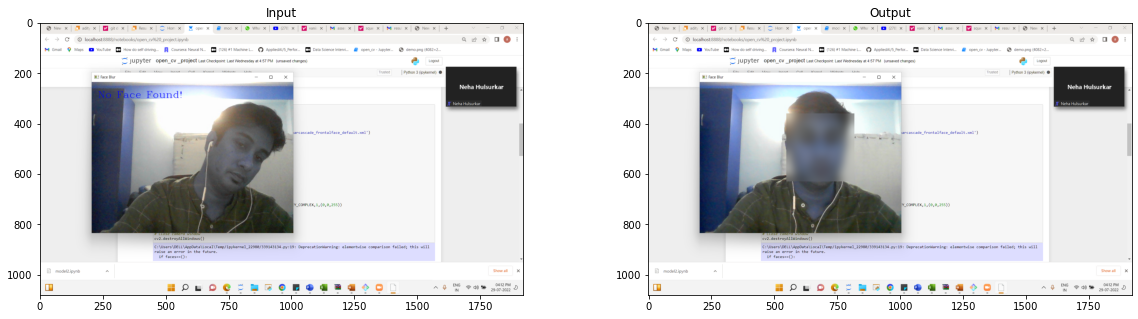

In [11]:
#output 
img=cv2.imread("Screenshot (528).png")

img2=cv2.imread("Screenshot (529).png")
plt.figure(figsize=[20,5])

plt.subplot(121)
plt.imshow(img2)
plt.title('Input')
  
plt.subplot(122)
plt.imshow(img)
plt.title('Output')
  
plt.show()
  


## volume and brigthness 

In [ ]:
#volume and brigthness 
import cv2 
import mediapipe as mp 
from math import hypot 
import numpy as np 
from ctypes import cast, POINTER
from comtypes import CLSCTX_ALL
from pycaw.pycaw import AudioUtilities, IAudioEndpointVolume
from google.protobuf.json_format import MessageToDict
import screen_brightness_control as sbc

# Left Hand for Brightness
# Right Hand for Volume

cap = cv2.VideoCapture(0)

mpHands = mp.solutions.hands 
hands = mpHands.Hands(min_detection_confidence=0.75)
mpDraw = mp.solutions.drawing_utils

devices = AudioUtilities.GetSpeakers()
interface = devices.Activate(IAudioEndpointVolume._iid_, CLSCTX_ALL, None)
volume = cast(interface, POINTER(IAudioEndpointVolume))

volMin,volMax = volume.GetVolumeRange()[:2]

while True:
    success,img = cap.read()
    img = cv2.flip(img,1)
    imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    results = hands.process(imgRGB)

    left_lmList,right_lmList = [],[]
    if results.multi_hand_landmarks and results.multi_handedness:
        for i in results.multi_handedness:
            label = MessageToDict(i)['classification'][0]['label']
            if label == 'Left':
                for lm in results.multi_hand_landmarks[0].landmark:
                    h,w,_ = img.shape
                    left_lmList.append([int(lm.x*w),int(lm.y*h)])  
                mpDraw.draw_landmarks(img,results.multi_hand_landmarks[0],mpHands.HAND_CONNECTIONS)
            if label=='Right':
                index = 0
                if len(results.multi_hand_landmarks)==2:
                    index=1
                for lm in results.multi_hand_landmarks[index].landmark:
                    h,w,_ = img.shape
                    right_lmList.append([int(lm.x*w),int(lm.y*h)])  
                    mpDraw.draw_landmarks(img,results.multi_hand_landmarks[index],mpHands.HAND_CONNECTIONS)

    if left_lmList!=[]:
        x1,y1 = left_lmList[4][0],left_lmList[4][1]
        x2,y2 = left_lmList[8][0],left_lmList[8][1]

        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),3)

        length = hypot(x2-x1,y2-y1)

        bright = np.interp(length,[15,200],[0,100])
        print(bright,length)
        sbc.set_brightness(int(bright))

    if right_lmList!=[]:
        x1,y1 = right_lmList[4][0],right_lmList[4][1]
        x2,y2 = right_lmList[8][0],right_lmList[8][1]
        
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),3)

        length = hypot(x2-x1,y2-y1)

        vol = np.interp(length,[15,200],[volMin,volMax])
        print(vol,length)
        volume.SetMasterVolumeLevel(vol, None)
        
    cv2.imshow('Image',img)
    if cv2.waitKey(1) & 0xff==ord('q'):
        break

0.0 249.19470299346256
0.0 283.11481769769665
0.0 280.8647361275531
0.0 286.457675756821
0.0 286.20447236198106
0.0 279.89462302802457
0.0 285.9545418418809
0.0 283.55775425828153
0.0 282.0815484926301
0.0 281.83150994876354
0.0 281.1138559374119
0.0 279.1791539495741
0.0 279.1791539495741
0.0 280.8629559055448
0.0 275.056357861439
0.0 276.27884464793897
0.0 277.3337339740696
0.0 274.08940147331487
0.0 276.27884464793897
0.0 279.25973573001886
0.0 276.5375200583096
0.0 280.40149785619906
0.0 278.16002588438187
0.0 279.1200458584084
0.0 277.3337339740696
0.0 281.04092228712886
0.0 276.240836952106
0.0 279.1200458584084
0.0 277.6058356735319
0.0 277.6058356735319
0.0 276.6441757926597
0.0 277.8812696098821
0.0 278.16002588438187
0.0 276.37112729082247
0.0 276.6441757926597
0.0 274.04014304477363
0.0 277.8812696098821
0.0 277.8812696098821
0.0 277.2002886001384
0.0 274.4467161399458
0.0 279.8035024798653
0.0 276.6441757926597
0.0 274.34649624152297
0.0 276.37112729082247
0.0 277.605835673

0.0 265.70660511172844
0.0 266.0018796926067
0.0 271.0073799733136
0.0 283.3972476930572
0.0 278.62699079593847
0.0 281.13519879232484
0.0 284.00704216621114
0.0 284.41694745566764
0.0 276.38379113110085
0.0 278.2804340948174
0.0 273.86493021195685
0.0 274.8035662068453
0.0 271.64130760986995
0.0 268.81220210399675
0.0 261.5205536855564
0.0 246.6779276708802
0.0 225.80079716422614
0.0 210.00952359357422
0.0 202.08166665979374
-6.048969497702622 182.84966502567073
-6.048969497702622 182.84966502567073
-11.770278582215816 166.6283289239858
-15.962717571464289 154.74172029546523
-15.743206618467937 155.3640885146886
-14.986785799618993 157.50872991678906
-14.164348125480537 159.84054554461457
-13.771838033189255 160.9534094078159
-15.165092970593534 157.0031846810758
-16.817307597497667 152.31874474272692
-18.30599663807768 148.0979405663698
-18.261956522143578 148.22280526288793
-17.21240508612437 151.19854496654392
-17.296448953801978 150.96025967121278
-17.40520235941024 150.6519166821

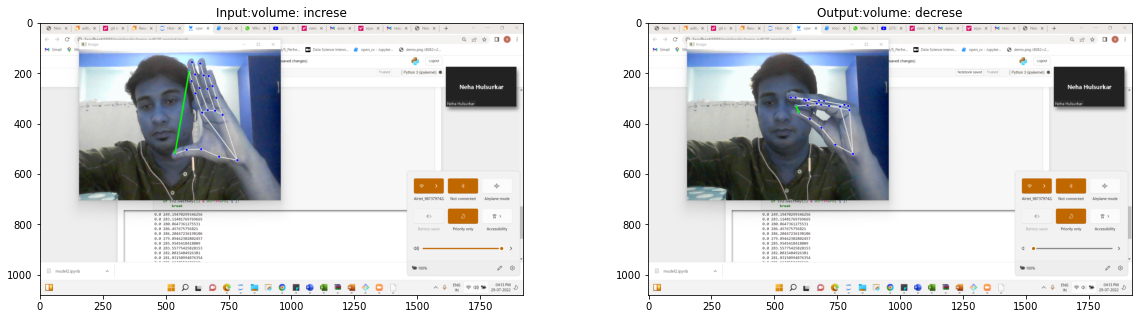

In [14]:

img=cv2.imread("Screenshot (530).png")

img2=cv2.imread("Screenshot (531).png")
plt.figure(figsize=[20,5])

plt.subplot(121)
plt.imshow(img2)
plt.title('Input:volume: increse')
  
plt.subplot(122)
plt.imshow(img)
plt.title('Output:volume: decrese')
  
plt.show()
  